In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def probability(x):
    sigma = 1
    return np.exp(- x ** 2 / (2 * sigma ** 2))

In [12]:
N = 1000000
delta = 10
def metropolise():
    counter = 0  #accepted steps
    data = np.zeros(N + 1)
    data[0] = 0
    step = delta * np.random.uniform(-1, 1, N) #metropolise step
    print(len(step))

    for i in range(N):
        data[i + 1] = data[i]
        x = data[i]
        y = data[i] + step[i]
        if np.random.uniform(0, 1) < probability(y) / probability(x):
            data[i + 1] = data[i] + step[i]
            counter += 1
    return data, counter

1000000
acceptance rate=0.159617


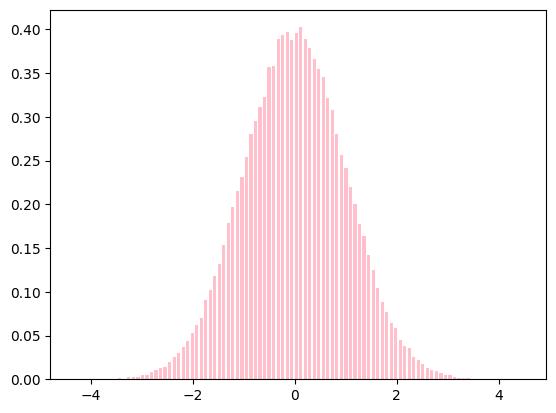

In [13]:
data , counter = metropolise()
plt.hist(data, bins=100, rwidth=0.7, color='pink', density=True)
print('acceptance rate=%s'%(counter/N))
plt.show()

In [5]:
#correlation length
J = np.linspace(0, 12, 13, dtype=int)
c_j = np.zeros(len(J))
for i, j in enumerate(J):
    c_j[i] = (np.mean(np.multiply(data[j:], data[:len(data) - j])) - np.mean(data[j:]) * np.mean(
        data[:len(data) - j])) / np.var(data)

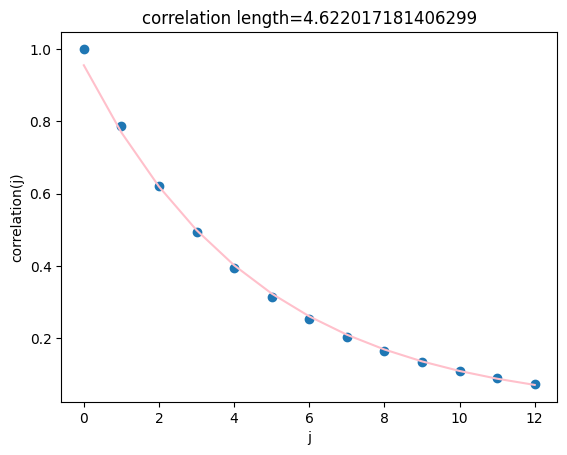

In [9]:
a, b = np.polyfit(J, np.log(c_j), 1)
y = np.exp(b) * np.exp(a * J)
plt.title('correlation length=%s' %(-1/a))
plt.scatter(J, c_j)
plt.plot(J, y, color='pink')
plt.xlabel('j')
plt.ylabel('correlation(j)')
plt.show()